In [ ]:
import numpy as np
import pandas as pd
import sqlite3


In [270]:
import sqlalchemy as db


In [271]:
connection = sqlite3.connect('lotto_numbers')


In [392]:
connection.close()


In [272]:
df = pd.read_sql_query("SELECT * FROM lotto_numbers", connection)

In [273]:
df.head()

,page,date,day_of_week,time_of_day,first,second,third,fourth,fifth
0,7112,"Jan 19, 2014",Sunday,midday,12,17,20,22,35
1,7113,"Jan 19, 2014",Sunday,evening,11,13,20,24,38
2,7114,"Jan 20, 2014",Monday,midday,3,5,12,18,32
3,7115,"Jan 20, 2014",Monday,evening,3,5,12,16,29
4,7116,"Jan 21, 2014",Tuesday,midday,20,29,35,36,37


In [275]:
df.describe

<bound method NDFrame.describe of        page          date day_of_week time_of_day  first  second  third  \
0      7112  Jan 19, 2014      Sunday      midday     12      17     20   
1      7113  Jan 19, 2014      Sunday     evening     11      13     20   
2      7114  Jan 20, 2014      Monday      midday      3       5     12   
3      7115  Jan 20, 2014      Monday     evening      3       5     12   
4      7116  Jan 21, 2014     Tuesday      midday     20      29     35   
...     ...           ...         ...         ...    ...     ...    ...   
6885  13998  Jun 24, 2023    Saturday      midday      4       5     23   
6886  13999  Jun 24, 2023    Saturday     evening      4       8     18   
6887  14000  Jun 25, 2023      Sunday      midday     12      32     36   
6888  14001  Jun 25, 2023      Sunday     evening      2      10     17   
6889  14002  Jun 26, 2023      Monday      midday      1       6     22   

      fourth  fifth  
0         22     35  
1         24     38  

In [276]:
import seaborn as sns
%matplotlib inline

In [136]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<Axes: xlabel='first', ylabel='count'>

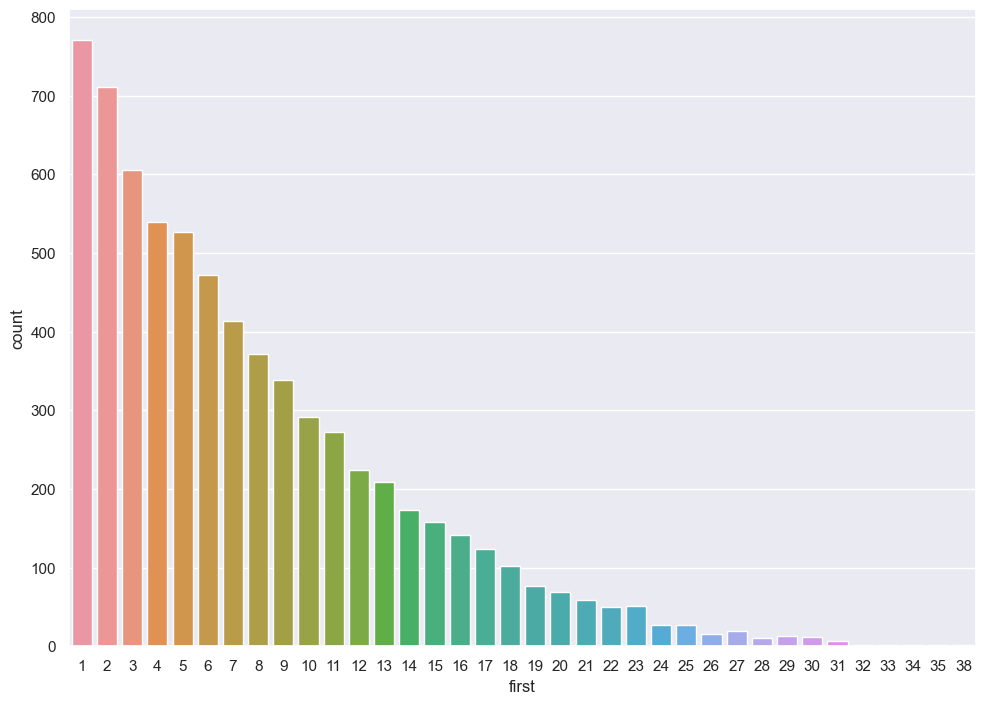

In [137]:
sns.countplot(x='first', data=df)

<Axes: xlabel='second', ylabel='count'>

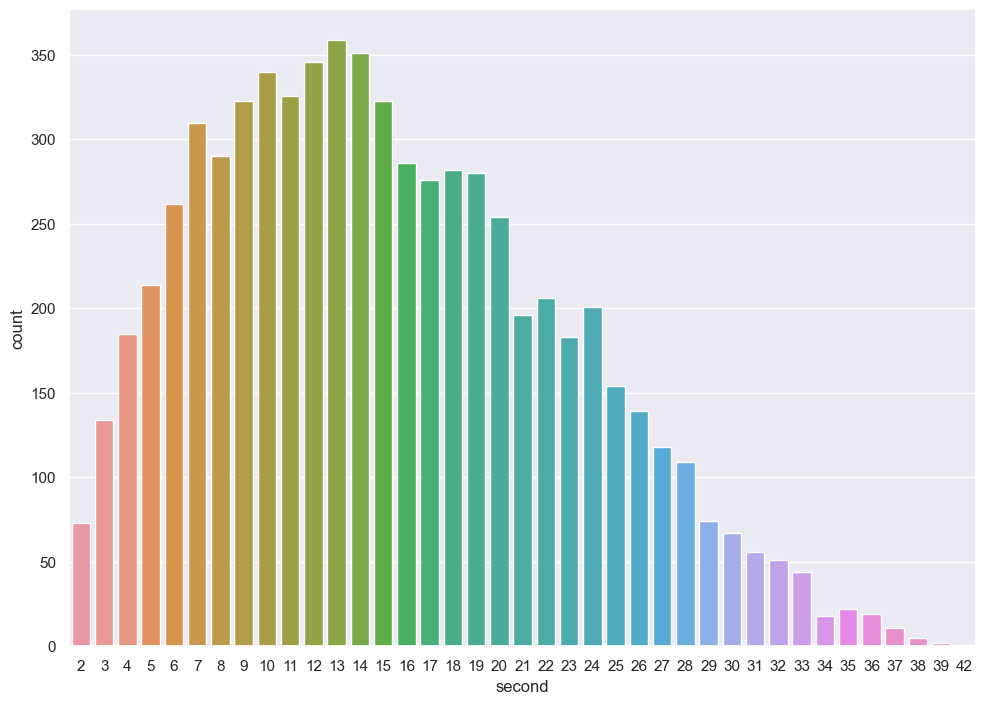

In [138]:
sns.countplot(x='second', data=df)

<Axes: xlabel='third', ylabel='count'>

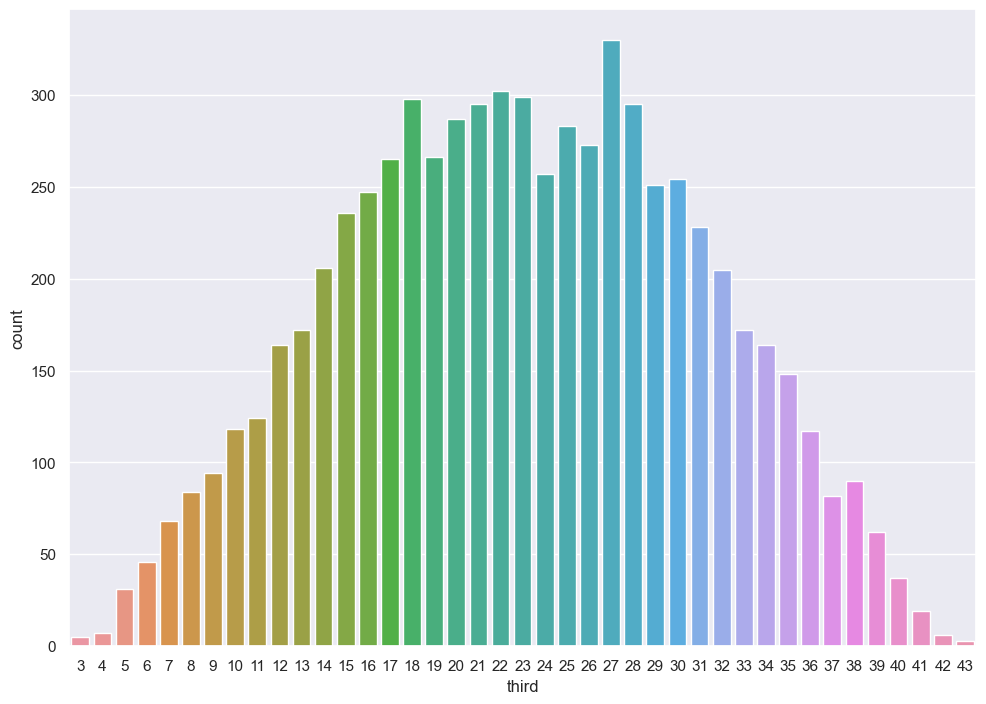

In [139]:
sns.countplot(x='third', data=df)

In [140]:
print(df['third'].value_counts()[24])

257


<Axes: xlabel='fourth', ylabel='count'>

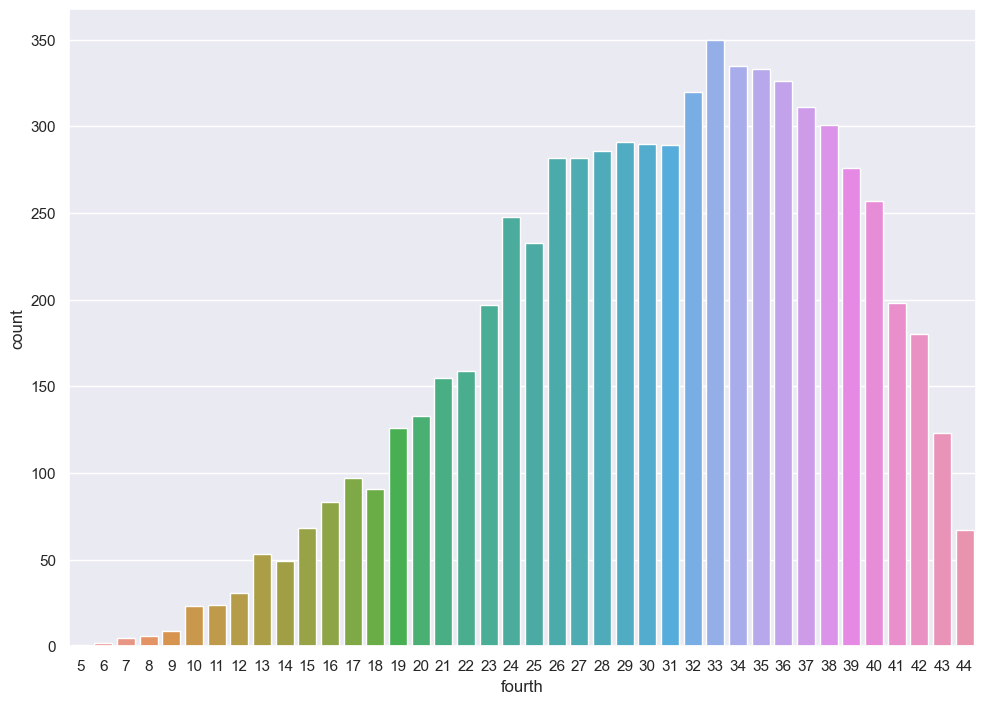

In [141]:
sns.countplot(x='fourth', data=df)

<Axes: xlabel='fifth', ylabel='count'>

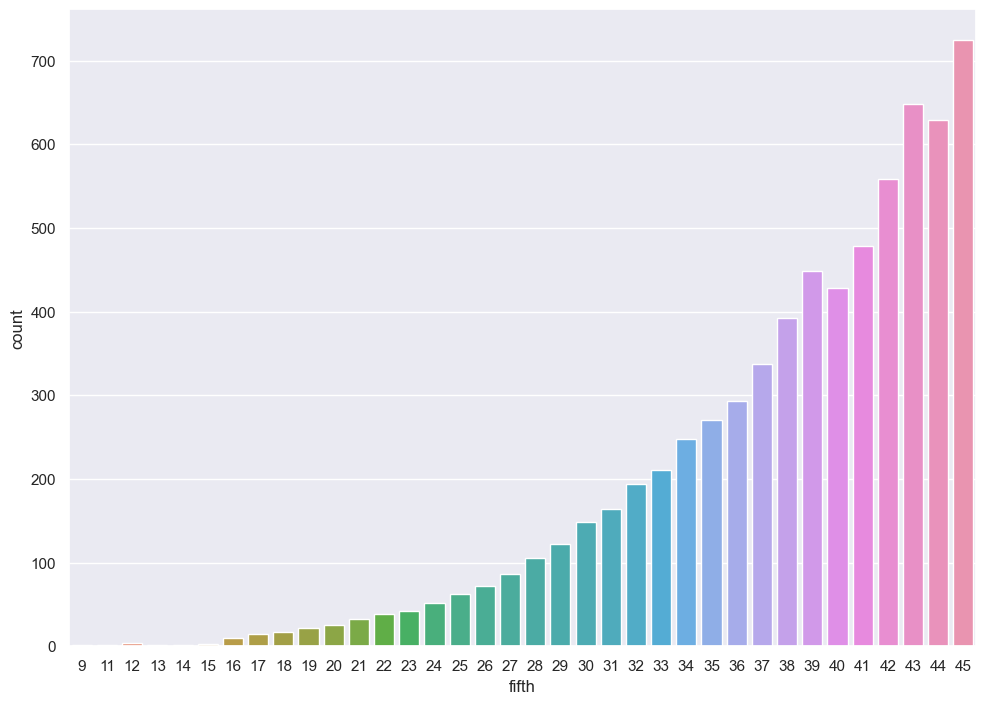

In [142]:
sns.countplot(x='fifth', data=df)

In [277]:
df.columns

Index(['page', 'date', 'day_of_week', 'time_of_day', 'first', 'second',
       'third', 'fourth', 'fifth'],
      dtype='object')

In [278]:
lotto= pd.DataFrame(df, columns= df.columns[4:9])

In [279]:
lotto.head()

,first,second,third,fourth,fifth
0,12,17,20,22,35
1,11,13,20,24,38
2,3,5,12,18,32
3,3,5,12,16,29
4,20,29,35,36,37


In [282]:
def converter(col):
    if col % 2 ==0 :
        return 1
    else:
        return 0

In [283]:
lotto['isEven'] = lotto['fifth'].apply(converter)

In [284]:
lotto['isEven']

0       0
1       1
2       1
3       0
4       0
       ..
6885    0
6886    1
6887    0
6888    0
6889    1
Name: isEven, Length: 6890, dtype: int64

In [285]:
lotto

,first,second,third,fourth,fifth,isEven
0,12,17,20,22,35,0
1,11,13,20,24,38,1
2,3,5,12,18,32,1
3,3,5,12,16,29,0
4,20,29,35,36,37,0
...,...,...,...,...,...,...
6885,4,5,23,31,45,0
6886,4,8,18,22,28,1
6887,12,32,36,38,41,0
6888,2,10,17,35,43,0


In [286]:
lotto.describe()

,first,second,third,fourth,fifth,isEven
count,6890.000000,6890.000000,6890.000000,6890.000000,6890.000000,6890.000000
mean,7.691872,15.207112,22.955733,30.435269,38.056459,0.467199
std,6.048731,7.568427,8.049306,7.690935,6.156344,0.498959
min,1.000000,2.000000,3.000000,5.000000,9.000000,0.000000
25%,3.000000,9.000000,17.000000,25.000000,35.000000,0.000000
50%,6.000000,14.000000,23.000000,31.000000,40.000000,0.000000
75%,11.000000,20.000000,29.000000,36.000000,43.000000,1.000000
max,38.000000,42.000000,43.000000,44.000000,45.000000,1.000000


In [287]:
X = lotto.drop('isEven', axis=1)

In [288]:
y = lotto['isEven']

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

NameError: name 'train_test_split' is not defined

In [290]:
X_train

,first,second,third,fourth,fifth
6174,5,11,16,18,23
863,2,15,26,34,41
304,14,21,26,31,39
1358,1,3,11,14,42
2775,1,7,9,12,40
...,...,...,...,...,...
1853,7,9,21,32,39
5464,2,6,8,23,35
4301,6,8,18,37,39
4325,23,24,25,35,36


In [ ]:
from sklearn.model_selection import train_test_split

In [1]:
from sklearn.svm import SVC

ModuleNotFoundError: No module named 'sklearn'

In [293]:
svc_model = SVC()

In [294]:
svc_model.fit(X_train,y_train)

SVC()

In [295]:
predictions = svc_model.predict(X_test)

In [296]:
from sklearn.metrics import classification_report,confusion_matrix

In [297]:
print(confusion_matrix(y_test,predictions))

[[783 364]
 [567 353]]


In [298]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.68      0.63      1147
           1       0.49      0.38      0.43       920

    accuracy                           0.55      2067
   macro avg       0.54      0.53      0.53      2067
weighted avg       0.54      0.55      0.54      2067



In [299]:
from sklearn.model_selection import GridSearchCV

In [300]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [301]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   1.6s
[CV] END .....................................C=0.1, gamma=1; total time=   1.7s
[CV] END .....................................C=0.1, gamma=1; total time=   1.4s
[CV] END .....................................C=0.1, gamma=1; total time=   1.4s
[CV] END .....................................C=0.1, gamma=1; total time=   1.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.2s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [302]:
grid_predictions = grid.predict(X_test)

In [303]:
print(confusion_matrix(y_test,grid_predictions))

[[632 515]
 [430 490]]


In [305]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57      1147
           1       0.49      0.53      0.51       920

    accuracy                           0.54      2067
   macro avg       0.54      0.54      0.54      2067
weighted avg       0.55      0.54      0.54      2067



In [313]:
y_train.head()

6174    0
863     0
304     0
1358    1
2775    1
Name: isEven, dtype: int64

In [314]:
y_test.head()

2909    1
3981    0
5981    1
2992    1
2254    0
Name: isEven, dtype: int64

In [315]:
from sklearn.ensemble import RandomForestClassifier

In [316]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [318]:
rfc_preds = rfc.predict(X_test)
from sklearn.metrics import classification_report

In [319]:
rfc_preds

array([1, 0, 1, ..., 0, 0, 0])

In [320]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1147
           1       0.91      0.92      0.91       920

    accuracy                           0.92      2067
   macro avg       0.92      0.92      0.92      2067
weighted avg       0.92      0.92      0.92      2067



In [322]:
lotto.describe()

,first,second,third,fourth,fifth,isEven
count,6890.000000,6890.000000,6890.000000,6890.000000,6890.000000,6890.000000
mean,7.691872,15.207112,22.955733,30.435269,38.056459,0.467199
std,6.048731,7.568427,8.049306,7.690935,6.156344,0.498959
min,1.000000,2.000000,3.000000,5.000000,9.000000,0.000000
25%,3.000000,9.000000,17.000000,25.000000,35.000000,0.000000
50%,6.000000,14.000000,23.000000,31.000000,40.000000,0.000000
75%,11.000000,20.000000,29.000000,36.000000,43.000000,1.000000
max,38.000000,42.000000,43.000000,44.000000,45.000000,1.000000


In [323]:
long_lotto = lotto.T

In [324]:
long_lotto.head()

,0,1,2,3,4,5,6,7,8,9,...,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889
first,12,11,3,3,20,11,1,12,10,9,...,3,7,2,2,13,4,4,12,2,1
second,17,13,5,5,29,14,3,28,18,11,...,4,10,12,5,14,5,8,32,10,6
third,20,20,12,12,35,19,22,29,21,13,...,31,15,17,8,21,23,18,36,17,22
fourth,22,24,18,16,36,23,26,31,33,19,...,32,23,22,21,23,31,22,38,35,23
fifth,35,38,32,29,37,30,36,39,35,20,...,43,26,28,41,39,45,28,41,43,34


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [326]:
long_lotto[6889]

first      1
second     6
third     22
fourth    23
fifth     34
isEven     1
Name: 6889, dtype: int64

In [343]:
X= long_lotto.drop([6888, 6889], axis=1)

In [369]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887
first,12,11,3,3,20,11,1,12,10,9,...,15,5,3,7,2,2,13,4,4,12
second,17,13,5,5,29,14,3,28,18,11,...,23,14,4,10,12,5,14,5,8,32
third,20,20,12,12,35,19,22,29,21,13,...,26,30,31,15,17,8,21,23,18,36
fourth,22,24,18,16,36,23,26,31,33,19,...,29,31,32,23,22,21,23,31,22,38
fifth,35,38,32,29,37,30,36,39,35,20,...,37,44,43,26,28,41,39,45,28,41


In [351]:
 y = long_lotto[6888]

In [370]:
y.head()

first      2
second    10
third     17
fourth    35
fifth     43
Name: 6888, dtype: int64

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [385]:
svc_long = SVC()

In [386]:
svc_long.fit(X_train, y_train)

SVC()

In [389]:
predictions = svc_long.predict(X_train)

In [390]:
print(predictions)

[43  2  0 10]


In [391]:
print(classification_report(y_test,predictions))

ValueError: Found input variables with inconsistent numbers of samples: [2, 4]

In [382]:
scores = ["precision", "recall"]

In [383]:
grid_search = GridSearchCV(
    SVC(), scoring=scores, refit=refit_strategy
)
grid_search.fit(X_train, y_train)

NameError: name 'refit_strategy' is not defined